# Funções, bibliotecas e Dataframe ficticios

In [1]:
import pandas as pd
import numpy as np

# Manipulação e Tratamento de dados
import openpyxl
import pandas as pd
import numpy as np
from numpy import NaN

#ignorando Warning inuteis
import warnings 
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
import requests

# CARREGANDO BASE
arquivo = 'fake_database'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
response = requests.get(url); code = response.text; exec(code)
#df = fake_database2(2250); df_bck = df.copy(); display(df.head())

arquivo = 'funcoes_estatisticas'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
response = requests.get(url); code = response.text; exec(code)

# Função para avaliação de modelos exibindo metricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
arquivo = 'ML_supervised_learning'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url); response = requests.get(url); code = response.text; exec(code)

print('TUDO OK')

https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/fake_database.py
https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/funcoes_estatisticas.py
https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/ML_supervised_learning.py
TUDO OK


In [3]:
# Criando dataframe sintetico desbalanceado

In [4]:
from sklearn.datasets import make_classification
import pandas as pd

# Gerar dados sintéticos desbalanceados
x, y = make_classification(n_samples=1500, n_features=15, n_classes=2, 
                           weights=[0.93, 0.07], flip_y=0, random_state=3141592)

# Criar um DataFrame
df = pd.DataFrame(x, columns=[f'feature_{i}' for i in range(x.shape[1])])
df['target'] = y

# Ver a distribuição de classes
print(df['target'].value_counts(normalize=True))
print(df['target'].value_counts())

display(df.head(3).T)
# Salvar para análise
#df.to_csv('imbalanced_dataset.csv', index=False)


target
0    0.93
1    0.07
Name: proportion, dtype: float64
target
0    1395
1     105
Name: count, dtype: int64


,0,1,2
feature_0,0.415218,-0.981843,-0.306742
feature_1,1.661531,0.677912,0.014217
feature_2,0.269207,-0.361667,1.932639
feature_3,1.603529,-0.086564,-0.776874
feature_4,0.068795,-0.386879,-1.782299
feature_5,-0.629828,-0.029423,-1.123243
feature_6,-0.844045,-1.412528,-0.505651
feature_7,-2.575730,0.184056,-1.131401
feature_8,-0.337475,0.078550,0.470927
feature_9,-0.723984,1.929439,-0.932682


In [5]:
# Variavel Dependente
var_dep = 'target'
y = df[var_dep]
display(y.head())

x = df.drop(var_dep, axis=1)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [6]:
# DUMMYRIZAÇÃO
colunas_categoricas = []
colunas_binarias = []
colunas_mais3_categorias = []

for coluna in x.columns:
    if df[coluna].dtype == 'O':
        categorias = x[coluna].unique()
        if len(categorias) == 2:
            print('2 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_binarias.append(coluna)
        else:
            print('3 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_mais3_categorias.append(coluna)

############################################################################################
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder #transformando colunas com 2 categorias em 0 e 1

coluna = x.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'), #caso a coluna tenha apenas 2 categorias 
    colunas_categoricas), #passando quais são essas colunas
    remainder = 'passthrough', sparse_threshold=0) #oque deve ser feito com as outras

#Aplicando transformação
x = one_hot.fit_transform(x)

#Os novos nomes das colunas #'onehotencoder=transformadas; 'remainder'=não transformadas
novos_nomes_colunas = one_hot.get_feature_names_out(coluna)

x = pd.DataFrame(x, columns = novos_nomes_colunas) #alterando de volta
x_columns = x.columns.tolist() 

############################################################################################
# Normalização (scaling entre 0 e 1) com MinMaxScaler ******************************
from sklearn.preprocessing import MinMaxScaler
normalizacao = MinMaxScaler()
x = normalizacao.fit_transform(x)
# df['Close_normalizada'] = (df[coluna] - df[coluna].min()) / (df[coluna].max() - df[coluna].min())

# Padronização (média 0 e desvio padrão 1) com StandardScaler **********************
#from sklearn.preprocessing import StandardScaler
#padronizacao = StandardScaler()
#x = padronizacao.fit_transform(x)
# df['Close_padronizada'] = (df[coluna] - df[coluna].mean()) / df[coluna].std()

############################################################################################
# DEFININDO A VARIAVEL DEPENDENTE
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

############################################################################################
#backups
x_inteiro = x
y_inteiro = y

# DIVIDINDO BASE EM TREINO E TESTE
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, 
                                                    stratify = y, #para manter a proporção da Var Dep nos splits
                                                    random_state = 5) #raiz da aleatoridade
# test_size = 0.25 #porcentagem que ira ser separado para testes

print(x_treino.shape, x_teste.shape)
print(y_treino.shape, y_teste.shape)

(1125, 15) (375, 15)
(1125,) (375,)


# XGBoost

In [7]:
from sklearn.model_selection import GridSearchCV

grid = {
        'learning_rate': [0.1, 0.2, 0.3],
        'max_depth': [0, 2, 4, 6, 8, 10], 
        'colsample_bytree': [0.1, 0.5, 1],
        'n_estimators': [25, 50, 100],
}

import xgboost as xgb
modelo_xgb = xgb.XGBClassifier()
modelo_xgb = GridSearchCV(estimator=modelo_xgb, 
                                param_grid=grid, 
                                cv=4, 
                                scoring='recall', 
                                verbose=1)
# Treinamento do Modelo
modelo_xgb.fit(x_treino, y_treino)

Fitting 4 folds for each of 162 candidates, totalling 648 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.1, 0.5, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [0, 2, 4, 6, 8, 10],
                         'n_estimators': [25, 50, 100]},
             scoring='recall', verbose=1)

In [8]:
modelo_xgb.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 25}

,threshold,tn,fp,fn,tp,acuracia,precisao,sensibilidade,especificidade,f1,valor_pre_posi,valor_pre_neg,taxa_falsos_positivos,taxa_falsos_negativos,fdr,fo_r,indice_youden,coef_matthews,fb_score
0,0.0,0,349,0,26,0.069,0.069,1.000,0.000,0.130,0.069,0.000,1.000,0.000,0.931,0.000,0.000,0.000,0.130
1,0.1,315,34,3,23,0.901,0.404,0.885,0.903,0.554,0.404,0.991,0.097,0.115,0.596,0.009,0.787,0.557,0.554
2,0.2,333,16,6,20,0.941,0.556,0.769,0.954,0.645,0.556,0.982,0.046,0.231,0.444,0.018,0.723,0.624,0.645
3,0.3,337,12,8,18,0.947,0.600,0.692,0.966,0.643,0.600,0.977,0.034,0.308,0.400,0.023,0.658,0.616,0.643
4,0.4,340,9,10,16,0.949,0.640,0.615,0.974,0.627,0.640,0.971,0.026,0.385,0.360,0.029,0.590,0.600,0.627
5,0.5,344,5,14,12,0.949,0.706,0.462,0.986,0.558,0.706,0.961,0.014,0.538,0.294,0.039,0.447,0.546,0.558
6,0.6,347,2,16,10,0.952,0.833,0.385,0.994,0.526,0.833,0.956,0.006,0.615,0.167,0.044,0.379,0.547,0.526
7,0.7,349,0,18,8,0.952,1.000,0.308,1.000,0.471,1.000,0.951,0.000,0.692,0.000,0.049,0.308,0.541,0.471
8,0.8,349,0,23,3,0.939,1.000,0.115,1.000,0.207,1.000,0.938,0.000,0.885,0.000,0.062,0.115,0.329,0.207
9,0.9,349,0,24,2,0.936,1.000,0.077,1.000,0.143,1.000,0.936,0.000,0.923,0.000,0.064,0.077,0.268,0.143


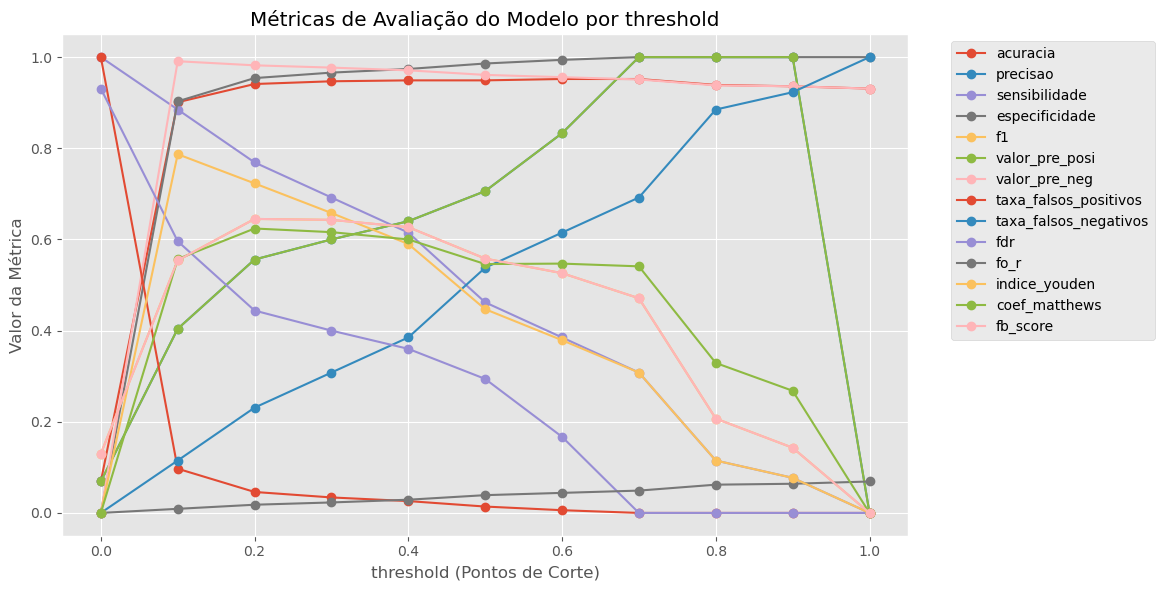

In [9]:
#######################################################################################
# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = modelo_xgb.predict(x_teste)

fd_xgb = aval_modelo_corte_tabela(x_teste, y_teste, modelo_xgb)
display(fd_xgb)
aval_modelo_corte_grafico(fd_xgb)

## XGBoost SMOTE

In [10]:
# BALANCEAMENTO DE DADOS - OVERSAMPLING
from imblearn.over_sampling import SMOTE

#criando dados sintéticos
oversample = SMOTE() 
x_balanceado, y_balanceado = oversample.fit_resample(x_treino, y_treino)

# checkando
print(pd.Series(y_balanceado).value_counts())
print(pd.Series(y_balanceado).value_counts(normalize = True))

#######################################################################################

0    1046
1    1046
Name: count, dtype: int64
0    0.5
1    0.5
Name: proportion, dtype: float64


In [11]:
from sklearn.model_selection import GridSearchCV

grid = {
        'learning_rate': [0.1, 0.2, 0.3],
        'max_depth': [0, 2, 4, 6, 8, 10], 
        'colsample_bytree': [0.1, 0.5, 1],
        'n_estimators': [25, 50, 100],
}

import xgboost as xgb
modelo_xgb_balanceado = xgb.XGBClassifier()
modelo_xgb_balanceado = GridSearchCV(estimator=modelo_xgb_balanceado, 
                                param_grid=grid, 
                                cv=4, 
                                scoring='recall', 
                                verbose=1)
# Treinamento do Modelo
modelo_xgb_balanceado.fit(x_balanceado, y_balanceado)

Fitting 4 folds for each of 162 candidates, totalling 648 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.1, 0.5, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [0, 2, 4, 6, 8, 10],
                         'n_estimators': [25, 50, 100]},
             scoring='recall', verbose=1)

In [12]:
modelo_xgb_balanceado.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.3,
 'max_depth': 10,
 'n_estimators': 100}

,threshold,tn,fp,fn,tp,acuracia,precisao,sensibilidade,especificidade,f1,valor_pre_posi,valor_pre_neg,taxa_falsos_positivos,taxa_falsos_negativos,fdr,fo_r,indice_youden,coef_matthews,fb_score
0,0.0,0,349,0,26,0.069,0.069,1.000,0.000,0.130,0.069,0.000,1.000,0.000,0.931,0.000,0.000,0.000,0.130
1,0.1,314,35,4,22,0.896,0.386,0.846,0.900,0.530,0.386,0.987,0.100,0.154,0.614,0.013,0.746,0.528,0.530
2,0.2,323,26,7,19,0.912,0.422,0.731,0.926,0.535,0.422,0.979,0.074,0.269,0.578,0.021,0.656,0.513,0.535
3,0.3,329,20,8,18,0.925,0.474,0.692,0.943,0.562,0.474,0.976,0.057,0.308,0.526,0.024,0.635,0.535,0.562
4,0.4,331,18,9,17,0.928,0.486,0.654,0.948,0.557,0.486,0.974,0.052,0.346,0.514,0.026,0.602,0.526,0.557
5,0.5,334,15,9,17,0.936,0.531,0.654,0.957,0.586,0.531,0.974,0.043,0.346,0.469,0.026,0.611,0.555,0.586
6,0.6,334,15,11,15,0.931,0.500,0.577,0.957,0.536,0.500,0.968,0.043,0.423,0.500,0.032,0.534,0.500,0.536
7,0.7,338,11,11,15,0.941,0.577,0.577,0.968,0.577,0.577,0.968,0.032,0.423,0.423,0.032,0.545,0.545,0.577
8,0.8,340,9,11,15,0.947,0.625,0.577,0.974,0.600,0.625,0.969,0.026,0.423,0.375,0.031,0.551,0.572,0.600
9,0.9,343,6,13,13,0.949,0.684,0.500,0.983,0.578,0.684,0.963,0.017,0.500,0.316,0.037,0.483,0.559,0.578


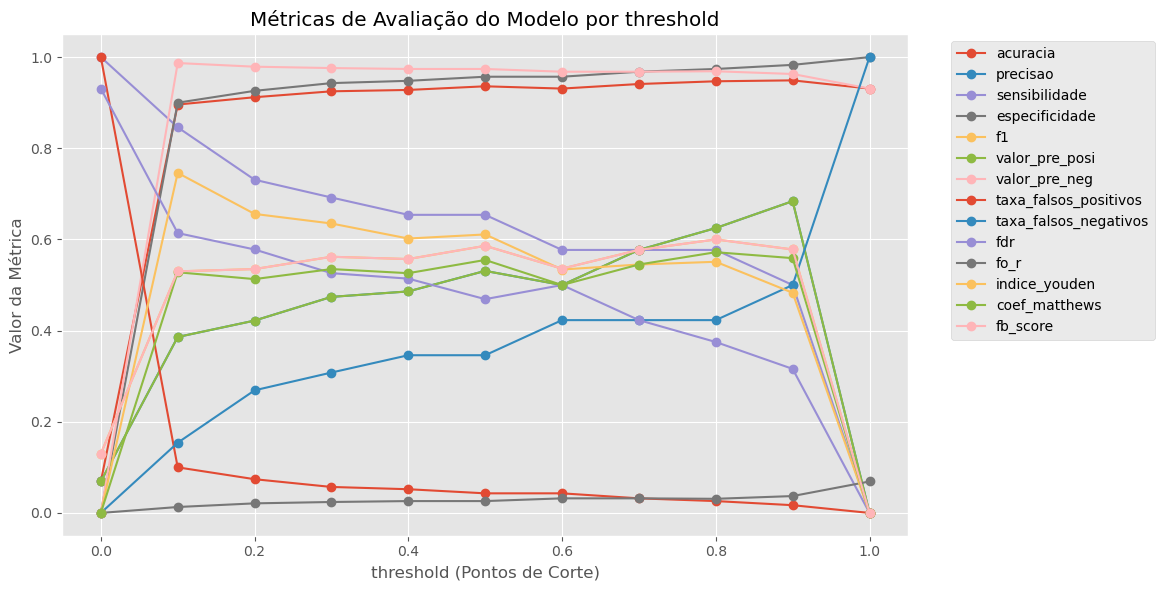

In [16]:
#######################################################################################
# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = modelo_xgb_balanceado.predict(x_teste)

fd_xgb_balanceado = aval_modelo_corte_tabela(x_teste, y_teste, modelo_xgb_balanceado)
display(fd_xgb_balanceado)
aval_modelo_corte_grafico(fd_xgb_balanceado)

# CatBoost

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Definir o grid de parâmetros para CatBoost
grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'depth': [2, 4, 6, 8, 10],  # Parâmetro equivalente ao 'max_depth' no CatBoost
    'colsample_bylevel': [0.1, 0.5, 1],  # Equivalente ao 'colsample_bytree'
    'iterations': [25, 50, 100]  # Equivalente ao 'n_estimators'
}

# Instanciar o modelo CatBoost
modelo_cat = CatBoostClassifier(verbose=0, random_seed=3141592)

# Definir o GridSearchCV com o CatBoost
modelo_cat = GridSearchCV(estimator=modelo_cat,
                          param_grid=grid,
                          cv=4,
                          scoring='recall',
                          verbose=1)

# Treinamento do Modelo
modelo_cat.fit(x_treino, y_treino)


#######################################################################################
# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = modelo_cat.predict(x_teste)
#avaliar_modelo(y_teste, previsoes, "Teste")

fd_cat = aval_modelo_corte_tabela(x_teste, y_teste, modelo_cat)
display(fd_cat)
aval_modelo_corte_grafico(fd_cat)

# Regressão Logistica

In [17]:
# Importar as bibliotecas necessárias
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir o grid de parâmetros para a Regressão Logística
grid = {
    'C': [0.1, 1, 10, 100],  # Parâmetro de regularização
    'solver': ['liblinear', 'saga'],  # Solvers que suportam classificação binária
    'penalty': ['l1', 'l2'],  # Tipos de penalização
    'max_iter': [100, 200, 300]  # Número máximo de iterações
}

# Instanciar o modelo de Regressão Logística
modelo_lr = LogisticRegression(random_state=3141592)

# Definir o GridSearchCV com a Regressão Logística
modelo_lr = GridSearchCV(estimator=modelo_lr, 
                         param_grid=grid, 
                         cv=4, 
                         scoring='recall',  # Usando recall como métrica
                         verbose=1)

# Treinamento do Modelo
modelo_lr.fit(x_treino, y_treino)


Fitting 4 folds for each of 48 candidates, totalling 192 fits


GridSearchCV(cv=4, estimator=LogisticRegression(random_state=3141592),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='recall', verbose=1)

,threshold,tn,fp,fn,tp,acuracia,precisao,sensibilidade,especificidade,f1,valor_pre_posi,valor_pre_neg,taxa_falsos_positivos,taxa_falsos_negativos,fdr,fo_r,indice_youden,coef_matthews,fb_score
0,0.0,0,349,0,26,0.069,0.069,1.000,0.000,0.130,0.069,0.000,1.000,0.000,0.931,0.000,0.000,0.000,0.130
1,0.1,304,45,5,21,0.867,0.318,0.808,0.871,0.457,0.318,0.984,0.129,0.192,0.682,0.016,0.679,0.453,0.457
2,0.2,323,26,8,18,0.909,0.409,0.692,0.926,0.514,0.409,0.976,0.074,0.308,0.591,0.024,0.618,0.488,0.514
3,0.3,333,16,11,15,0.928,0.484,0.577,0.954,0.526,0.484,0.968,0.046,0.423,0.516,0.032,0.531,0.490,0.526
4,0.4,338,11,14,12,0.933,0.522,0.462,0.968,0.490,0.522,0.960,0.032,0.538,0.478,0.040,0.430,0.455,0.490
5,0.5,343,6,17,9,0.939,0.600,0.346,0.983,0.439,0.600,0.953,0.017,0.654,0.400,0.047,0.329,0.426,0.439
6,0.6,344,5,18,8,0.939,0.615,0.308,0.986,0.410,0.615,0.950,0.014,0.692,0.385,0.050,0.293,0.407,0.410
7,0.7,347,2,19,7,0.944,0.778,0.269,0.994,0.400,0.778,0.948,0.006,0.731,0.222,0.052,0.264,0.437,0.400
8,0.8,348,1,21,5,0.941,0.833,0.192,0.997,0.312,0.833,0.943,0.003,0.808,0.167,0.057,0.189,0.384,0.312
9,0.9,349,0,24,2,0.936,1.000,0.077,1.000,0.143,1.000,0.936,0.000,0.923,0.000,0.064,0.077,0.268,0.143


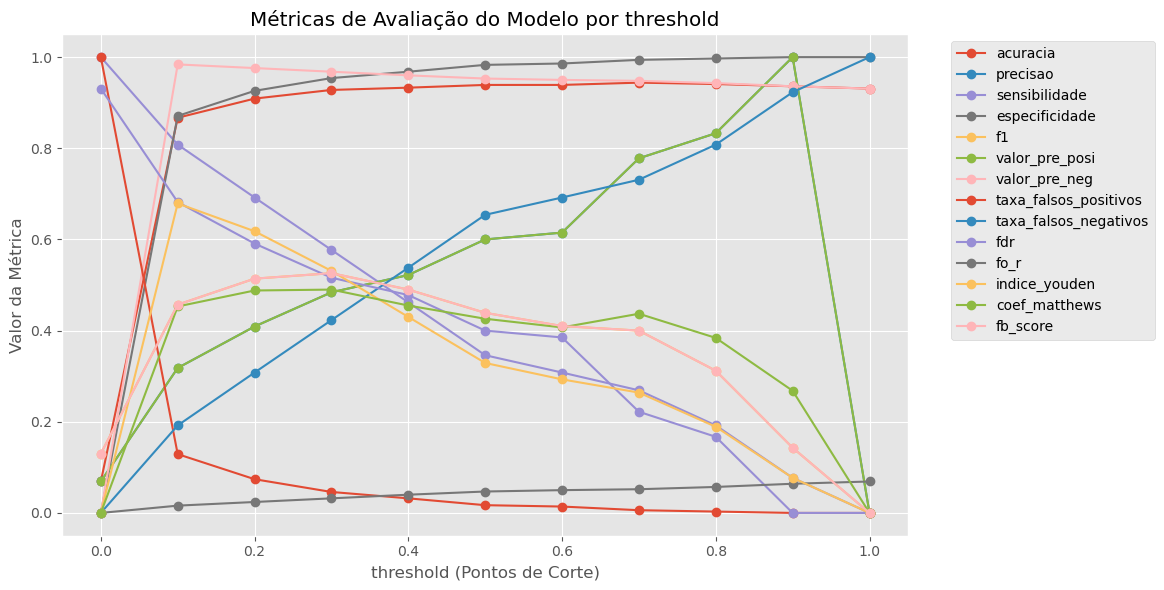

In [18]:
#######################################################################################
# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = modelo_lr.predict(x_teste)

fd_lr = aval_modelo_corte_tabela(x_teste, y_teste, modelo_lr)
display(fd_lr)
aval_modelo_corte_grafico(fd_lr)

# Combinando tudo em emsamble

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# Definir o ensemble com votação
ensemble_model = VotingClassifier(
    estimators=[
        #('catboost', modelo_cat.best_estimator_),  # Usando o melhor estimador do GridSearchCV
        ('logistic', modelo_lr.best_estimator_),
        ('xgboost', modelo_xgb.best_estimator_),
        ('xgboost_balanceado', modelo_xgb_balanceado.best_estimator_)
    ], 
    voting='soft'  # 'soft' usa a média ponderada das probabilidades, 'hard' usa voto majoritário
)

# Treinar o modelo de ensemble
ensemble_model.fit(x_treino, y_treino)

# Avaliação com validação cruzada
scores = cross_val_score(ensemble_model, x_treino, y_treino, cv=4, scoring='recall')

# Exibir os resultados
print(f"Recall médio do ensemble: {scores.mean():.4f}")


Recall médio do ensemble: 0.4164


In [24]:
import numpy as np

# Fazer previsões probabilísticas com os modelos já treinados
#proba_cat = modelo_cat.predict_proba(x_teste)[:, 1]  # Probabilidade da classe 1
proba_lr = modelo_lr.predict_proba(x_teste)[:, 1]
proba_xgb = modelo_xgb.predict_proba(x_teste)[:, 1]
proba_xgb_balanceado = modelo_xgb_balanceado.predict_proba(x_teste)[:, 1]

# Combinar as probabilidades (média das probabilidades)
ensemble_proba = (proba_lr + proba_xgb + proba_xgb_balanceado) / 4 # proba_cat + 

# Definir a classe final com base na média ponderada das probabilidades
ensemble_pred = np.where(ensemble_proba > 0.5, 1, 0)

# Avaliar o ensemble
from sklearn.metrics import recall_score

recall = recall_score(y_teste, ensemble_pred)
print(f"Recall do ensemble: {recall:.4f}")


Recall do ensemble: 0.4231


In [26]:
fd = pd.DataFrame({'y': y_teste,
#'cat': proba_cat,
'lr': proba_lr,
'xgb': proba_xgb,
'xgb_balanceado': proba_xgb_balanceado
})

for coluna in fd.columns[1:]: fd[coluna] = fd[coluna]*100

fd.sample(6)

,y,lr,xgb,xgb_balanceado
200,0,2.562199,2.184716,0.626851
105,0,0.069276,1.495569,0.063335
304,0,7.620195,7.233506,0.106628
140,0,1.691940,15.580170,0.330357
358,0,8.028640,3.962853,0.617800
91,0,36.186991,45.364864,91.342117


In [27]:
display(summary_num_nonparametric_groups(fd, 'xgb', 'y'))
display(summary_num_nonparametric_groups(fd, 'xgb_balanceado', 'y'))
#display(summary_num_nonparametric_groups(fd, 'cat', 'y'))
display(summary_num_nonparametric_groups(fd, 'lr', 'y'))

,y,Resumo,P-value,Test_Used
0,Total,1.66 [1.37 - 3.94],<0.001,Mann-Whitney
1,0,1.52 [1.37 - 3.09],NaN,NaN
2,1,48.85 [27.7 - 72.7],NaN,NaN


,y,Resumo,P-value,Test_Used
0,Total,0.09 [0.02 - 0.91],<0.001,Mann-Whitney
1,0,0.08 [0.02 - 0.5],NaN,NaN
2,1,91.74 [21.03 - 99.11],NaN,NaN


,y,Resumo,P-value,Test_Used
0,Total,1.09 [0.17 - 5.16],<0.001,Mann-Whitney
1,0,0.9 [0.15 - 3.49],NaN,NaN
2,1,37.95 [15.38 - 70.11],NaN,NaN


# ===============================

In [28]:
import numpy as np
import itertools

# Gerar o linspace
#linspace_values = np.linspace(0.2, 0.8, 6).round(1)
linspace_values = list(range(20, 80, 10))

# Criar todas as combinações possíveis de 3 elementos
combinacoes = list(itertools.product(linspace_values, repeat=3))

print( 'Qtde:', len(combinacoes))
print( combinacoes[:10] )


Qtde: 216
[(20, 20, 20), (20, 20, 30), (20, 20, 40), (20, 20, 50), (20, 20, 60), (20, 20, 70), (20, 30, 20), (20, 30, 30), (20, 30, 40), (20, 30, 50)]


In [30]:
#fd.drop('cat', axis=1, inplace=True)
fd.head()

,y,lr,xgb,xgb_balanceado
0,0,0.234198,1.802612,0.013868
1,0,0.250773,1.372688,0.020223
2,0,0.120065,1.372688,0.007372
3,0,1.639812,1.472597,0.006453
4,0,1.354829,1.380999,0.006847


In [31]:
i = 200
print(combinacoes[i])

fd['lr_p'] = np.where(fd['lr'] >= combinacoes[i][0], 1, 0)
fd['xgb_p'] = np.where(fd['xgb'] >= combinacoes[i][1], 1, 0)
fd['xgb_balanceado_p'] = np.where(fd['xgb_balanceado'] >= combinacoes[i][2], 1, 0)
fd.sample(10)

(70, 50, 40)


,y,lr,xgb,xgb_balanceado,lr_p,xgb_p,xgb_balanceado_p
313,1,2.655818,1.380999,0.375808,0,0,0
250,0,0.145487,1.372688,0.615509,0,0,0
120,0,12.675676,2.348421,0.379839,0,0,0
235,0,49.221630,57.701664,97.554031,0,1,1
284,0,0.386546,1.372688,0.102620,0,0,0
150,0,0.852721,1.907971,0.030779,0,0,0
54,1,50.176372,28.024832,11.227027,0,0,0
145,0,4.034314,5.298627,1.499249,0,0,0
201,0,0.153628,1.372688,0.776794,0,0,0
125,0,22.100217,4.909077,10.390354,0,0,0


In [32]:
fd['classificacao_final'] = np.where(fd['lr_p'] + fd['xgb_p'] + fd['xgb_balanceado_p'] >= 2, 1, 0)
fd.sample(10)

,y,lr,xgb,xgb_balanceado,lr_p,xgb_p,xgb_balanceado_p,classificacao_final
70,1,24.040191,61.779713,97.206047,0,1,1,1
321,0,1.655217,2.385280,0.143149,0,0,0,0
177,0,0.321911,10.427313,0.304704,0,0,0,0
289,0,0.024275,1.372688,0.002198,0,0,0,0
367,0,1.207211,1.372688,0.043517,0,0,0,0
318,0,0.210967,1.372688,0.010367,0,0,0,0
52,0,5.357820,1.631103,0.016454,0,0,0,0
200,0,2.562199,2.184716,0.626851,0,0,0,0
333,0,1.481400,1.593827,0.003195,0,0,0,0
153,1,48.135862,72.978058,99.801315,0,1,1,1


In [33]:
#######################################################################################
# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = fd['classificacao_final']

print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       349
           1       0.70      0.54      0.61        26

    accuracy                           0.95       375
   macro avg       0.83      0.76      0.79       375
weighted avg       0.95      0.95      0.95       375



# Replicando o algoritmo a todas as combinaçõoes de pontos de corte

In [34]:
beta = 1
tabela = pd.DataFrame(columns=['threshold', 'tn', 'fp', 'fn', 'tp'])

for i in range(len(combinacoes)):
    #print(combinacoes[i])

    fd['lr_p'] = np.where(fd['lr'] >= combinacoes[i][0], 1, 0)
    fd['xgb_p'] = np.where(fd['xgb'] >= combinacoes[i][1], 1, 0)
    fd['xgb_balanceado_p'] = np.where(fd['xgb_balanceado'] >= combinacoes[i][2], 1, 0)

    fd['classificacao_final'] = np.where(fd['lr_p'] + fd['xgb_p'] + fd['xgb_balanceado_p'] >= 2, 1, 0)
    #######################################################################################

    threshold = str(combinacoes[i])
    previsoes_personalizadas = fd['classificacao_final']

    # Calculando os valores de tn, fp, fn, tp
    tn = len(np.where((previsoes_personalizadas == 0) & (y_teste == 0))[0])
    fp = len(np.where((previsoes_personalizadas == 1) & (y_teste == 0))[0])
    fn = len(np.where((previsoes_personalizadas == 0) & (y_teste == 1))[0])
    tp = len(np.where((previsoes_personalizadas == 1) & (y_teste == 1))[0])

    # Adicionando os resultados ao DataFrame 'fd'
    tabela = pd.concat([tabela, pd.DataFrame([[threshold, tn, fp, fn, tp]], columns=tabela.columns)])
tabela.reset_index(drop=True, inplace=True)
tabela

,threshold,tn,fp,fn,tp
0,"(20, 20, 20)",329,20,6,20
1,"(20, 20, 30)",331,18,7,19
2,"(20, 20, 40)",331,18,7,19
3,"(20, 20, 50)",333,16,7,19
4,"(20, 20, 60)",333,16,8,18
...,...,...,...,...,...
211,"(70, 70, 30)",347,2,15,11
212,"(70, 70, 40)",348,1,15,11
213,"(70, 70, 50)",348,1,15,11
214,"(70, 70, 60)",348,1,15,11


In [35]:
######################################################################################

# Inicializar as colunas das métricas com NaN
metricas_de_aval = ['acuracia', 'precisao', 'sensibilidade', 'especificidade', 'f1',
                    'valor_pre_posi', 'valor_pre_neg', 'taxa_falsos_positivos', 'taxa_falsos_negativos',
                    'fdr', 'fo_r', 'indice_youden', 'coef_matthews', 'fb_score']
tabela[metricas_de_aval] = np.nan

# Loop para calcular as métricas em cada linha
for l in range(len(tabela)):
    # Calcular Acurácia
    if (tabela['tn'][l] + tabela['fp'][l] + tabela['fn'][l] + tabela['tp'][l]) != 0:
        tabela['acuracia'][l] = (tabela['tp'][l] + tabela['tn'][l]) / (tabela['tn'][l] + tabela['fp'][l] + tabela['fn'][l] + tabela['tp'][l])
    else:
        tabela['acuracia'][l] = 0

    # Calcular Precisão
    if (tabela['tp'][l] + tabela['fp'][l]) != 0:
        tabela['precisao'][l] = tabela['tp'][l] / (tabela['tp'][l] + tabela['fp'][l])
    else:
        tabela['precisao'][l] = 0

    # Calcular Sensibilidade (Recall)
    if (tabela['tp'][l] + tabela['fn'][l]) != 0:
        tabela['sensibilidade'][l] = tabela['tp'][l] / (tabela['tp'][l] + tabela['fn'][l])
    else:
        tabela['sensibilidade'][l] = 0

    # Calcular Especificidade
    if (tabela['tn'][l] + tabela['fp'][l]) != 0:
        tabela['especificidade'][l] = tabela['tn'][l] / (tabela['tn'][l] + tabela['fp'][l])
    else:
        tabela['especificidade'][l] = 0

    # Calcular F1-Score
    if (tabela['precisao'][l] + tabela['sensibilidade'][l]) != 0:
        tabela['f1'][l] = 2 * (tabela['precisao'][l] * tabela['sensibilidade'][l]) / (tabela['precisao'][l] + tabela['sensibilidade'][l])
    else:
        tabela['f1'][l] = 0

    # Calcular Valor Preditivo Positivo
    if (tabela['tp'][l] + tabela['fp'][l]) != 0:
        tabela['valor_pre_posi'][l] = tabela['tp'][l] / (tabela['tp'][l] + tabela['fp'][l])
    else:
        tabela['valor_pre_posi'][l] = 0

    # Calcular Valor Preditivo Negativo
    if (tabela['tn'][l] + tabela['fn'][l]) != 0:
        tabela['valor_pre_neg'][l] = tabela['tn'][l] / (tabela['tn'][l] + tabela['fn'][l])
    else:
        tabela['valor_pre_neg'][l] = 0

    # Calcular Taxa de Falsos Positivos
    tabela['taxa_falsos_positivos'][l] = 1 - tabela['especificidade'][l]

    # Calcular Taxa de Falsos Negativos
    tabela['taxa_falsos_negativos'][l] = 1 - tabela['sensibilidade'][l]

    # Calcular False Discovery Rate (FDR)
    if (tabela['tp'][l] + tabela['fp'][l]) != 0:
        tabela['fdr'][l] = tabela['fp'][l] / (tabela['tp'][l] + tabela['fp'][l])
    else:
        tabela['fdr'][l] = 0

    # Calcular False Omission Rate (FOR)
    if (tabela['tn'][l] + tabela['fn'][l]) != 0:
        tabela['fo_r'][l] = tabela['fn'][l] / (tabela['tn'][l] + tabela['fn'][l])
    else:
        tabela['fo_r'][l] = 0

    # Calcular Índice de Youden
    tabela['indice_youden'][l] = tabela['sensibilidade'][l] + tabela['especificidade'][l] - 1

    # Calcular Coeficiente de Matthews (MCC)
    denom_matthews = (tabela['tp'][l]+tabela['fp'][l])*(tabela['tp'][l]+tabela['fn'][l])*(tabela['tn'][l]+tabela['fp'][l])*(tabela['tn'][l]+tabela['fn'][l])
    if denom_matthews != 0:
        tabela['coef_matthews'][l] = (tabela['tp'][l]*tabela['tn'][l] - tabela['fp'][l]*tabela['fn'][l]) / np.sqrt(denom_matthews)
    else:
        tabela['coef_matthews'][l] = 0

    # Calcular F-beta Score
    denom_fb_score = (beta**2 * tabela['valor_pre_posi'][l]) + tabela['sensibilidade'][l]
    if denom_fb_score != 0:
        tabela['fb_score'][l] = (1 + beta**2) * (tabela['valor_pre_posi'][l] * tabela['sensibilidade'][l]) / denom_fb_score
    else:
        tabela['fb_score'][l] = 0

tabela[metricas_de_aval] = tabela[metricas_de_aval].round(3)
tabela

,threshold,tn,fp,fn,tp,acuracia,precisao,sensibilidade,especificidade,f1,valor_pre_posi,valor_pre_neg,taxa_falsos_positivos,taxa_falsos_negativos,fdr,fo_r,indice_youden,coef_matthews,fb_score
0,"(20, 20, 20)",329,20,6,20,0.931,0.500,0.769,0.943,0.606,0.500,0.982,0.057,0.231,0.500,0.018,0.712,0.586,0.606
1,"(20, 20, 30)",331,18,7,19,0.933,0.514,0.731,0.948,0.603,0.514,0.979,0.052,0.269,0.486,0.021,0.679,0.579,0.603
2,"(20, 20, 40)",331,18,7,19,0.933,0.514,0.731,0.948,0.603,0.514,0.979,0.052,0.269,0.486,0.021,0.679,0.579,0.603
3,"(20, 20, 50)",333,16,7,19,0.939,0.543,0.731,0.954,0.623,0.543,0.979,0.046,0.269,0.457,0.021,0.685,0.598,0.623
4,"(20, 20, 60)",333,16,8,18,0.936,0.529,0.692,0.954,0.600,0.529,0.977,0.046,0.308,0.471,0.023,0.646,0.572,0.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,"(70, 70, 30)",347,2,15,11,0.955,0.846,0.423,0.994,0.564,0.846,0.959,0.006,0.577,0.154,0.041,0.417,0.580,0.564
212,"(70, 70, 40)",348,1,15,11,0.957,0.917,0.423,0.997,0.579,0.917,0.959,0.003,0.577,0.083,0.041,0.420,0.606,0.579
213,"(70, 70, 50)",348,1,15,11,0.957,0.917,0.423,0.997,0.579,0.917,0.959,0.003,0.577,0.083,0.041,0.420,0.606,0.579
214,"(70, 70, 60)",348,1,15,11,0.957,0.917,0.423,0.997,0.579,0.917,0.959,0.003,0.577,0.083,0.041,0.420,0.606,0.579


In [37]:
tabela['index'] = tabela.index

fig = px.scatter(tabela, x='precisao', y='sensibilidade', 
                 hover_data=['f1','index','threshold'],
                 trendline="lowess")  # Adiciona a linha LOESS
fig.show()

In [38]:
# Selecionar colunas a partir da quinta
colunas = tabela.columns[5:-6]

# Criar um gráfico de boxplot para as colunas selecionadas
fig = px.box(tabela, y=colunas)
fig.show()

In [41]:
# Calcular a matriz de correlação
correlation_matrix = tabela[colunas].corr().round(2)

# Criar um gráfico de heatmap para a matriz de correlação
fig = px.imshow(correlation_matrix, text_auto=True, title='Matriz de Correlação')

# Exibir o gráfico
fig.show()

In [ ]:
tabela.tail()